<a href="https://colab.research.google.com/github/zmkalila/fashion-mnist/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Dataset source: https://github.com/zalandoresearch/fashion-mnist

- Dataset is made by a fashion company Zalando.

- Dataset consists of 2 parts:
   - Training set: 60000 images (28x28 pixel)
   - Test set: 10000 images (28x28 pixel)

<hr>

Each fashion item is being categorized into 10 dependent variables:
1. T-shirt/top
2. Trouser
3. Pullover (sweater)
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

<hr>

- **Features (Input)**: 60000 images with the size of 28x28 pixel
- **Target/Label (Output)**: 10 fashion item categories

How do we teach or train computers about the fashion item images and how to recognize each item?

- For the computer to be able to recognize every fashion item image and its name,  
the images have to come in the form of <u>numbers</u>.

- Images always consists of multiple pixels, where in this case, each fashion item image consists of 784 pixels (28x28 pixel).

- Each pixel has a value within the range from 0 to 255, which each value corresponds to the brightness level of the pixel in an image, where 0 is black and 255 is white.

- For coloured images,

- Black-and-white images only consists of one layer of 2-D array
- meanwhile coloured images consists of 3 layers of 2-D array (each is Red, Green, and Blue layer).

Steps:
1. Convolution
2. Pooling
3. Flattening
4. Fully connection
   
- Result of "Flatten" is the input for the Neural Network process.

- More number of layers does not always lead to better CNN performance.
  
- Accurate results can be obtained just from an adequate amount of layers, thus it does not have to be redundant nor need excessive computational process.

# Convolution

- Convolution uses *feature detector (kernel matrix)* to filter images.<br>The goal is to find features and find correlation between the pixels.

- We determine the numbers in feature detector (kernel matrix).

- Let's say the size of kernel matrix is 3x3 (3 rows and 3 columns).<br>It means when multiplying the **Input image** and the **Feature detector**, it is done for every 3x3 (9 pixels) of the input image.

- `Input Image` * `Feature detector` = `Feature map`

- Every feature map is then combined, forming `Convolutional layers`.

- After obtaining feature maps, we multiply that feature map with *activation function*
  
- `Feature maps` * `Activation function` = `Rectifier Linear Units (ReLU)`

- ReLU is used to add non-linearity that can make computation process easier and improve sparsity.

- It only takes positive value, meanwhile all the negative value is replaced with zero (0). 0 remains 0.

- The bigger the value of a pixel in the feature map, the more that pixel stands out in the image.

- Those pixels with big values in the feature map gets even more emphasized and stronger because of ReLU.<br>That way, the output layer will be able to categorize image into the pre-determined variables more easily

# Pooling / Downsampling -> Flattening

- Used to decrease the dimension of feature map, so that computation process can be easier while still keeping the main features.

- *Max pooling* method is used to keep the features that stand out the most.

- In CNN, usually the size of Max Pooling is 2x2 stride 2 (stride 2 maksudnya gesernya tiap 2 blok gituloh, beda sama pas ngekaliin input image sama feature detector, liat video bapak aja deh klo ga paham wkwk).
  
- Although max pooling technically reduces the dimension of feature map, the important features is still kept.<br><br>For example, a Machine Learning model is made to classify images into men and women. From the training data, men's images have strong features with big pixel value such as moustache, beard, adam's apple, etc. Let's say they have big values of pixel like 10, 9, 8 consecutively.<br><br>That way, when the test data give images of a person with a moustache in a lying down position or if the image is upside down, machine will still be able to recognize that it's a man because it detects moustache which is a strong feature in the training data, regardless of the person's position in the image.

- After max pooling result (let's say it's a 3x3 matrix) is obtained, it has to go through FLATTENING process, which transform the 3x3 matrix into 9x1 matrix.

<u>Layer sequence</u>:  
Input layer -> Convolution layer 1 -> Downsampling layer 1 -> Convolution layer 2 -> Downsampling layer 2 -> Fully-connected layer 1 -> Fully-connected layer 2 -> Output layer.

# Keras Pre-processing

Keras = TensorFlow 2.0

## Import library

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Import dataset

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Target/label

In [ ]:
category = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
            'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 0 = T-shirt/top
# 1 = Trouser
# 2 = Pullover
# 3 = Dress
# 4 = Coat
# 5 = Sandal
# 6 = Shirt
# 7 = Sneaker
# 8 = Bag
# 9 = Ankle boot

In [ ]:
i = random.randint(1, len(X_train)) # get random integer within range 1 to len(X_train)
i

38616

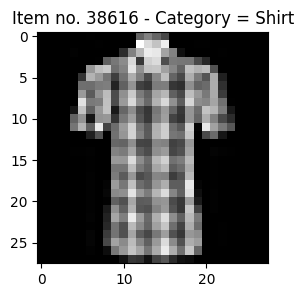

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[i,:,:], cmap='gray')
plt.title('Item no. {} - Category = {}'.format(i, category[y_train[i]]))
plt.show()

## Show multiple images at once

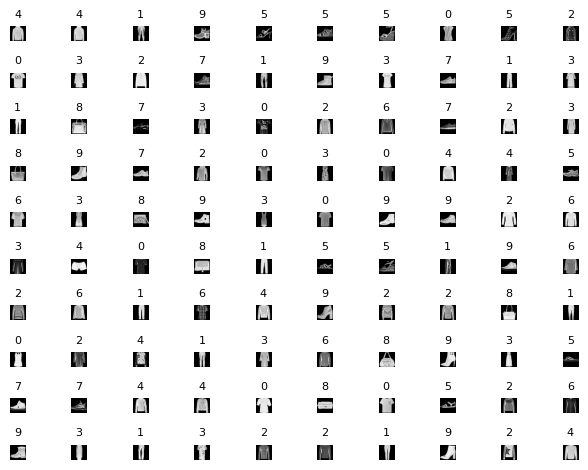

In [ ]:
fig, axes = plt.subplots(nrows= 10, ncols = 10)
axes = axes.ravel() # use ravel if ncols > 1 and nrows > 1

for i in np.arange(0, 10*10):
    indexing = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[indexing, :, :], cmap='gray')
    axes[i].set_title(int(y_train[indexing]), fontsize=8)
    axes[i].axis('off')

plt.tight_layout()

## Normalize dataset

In [ ]:
X_train = X_train/255
X_test = X_test/255

- `X_train` and `X_test` values that were initially within the range of 0 ~ 255, change to 0 ~ 1 after normalization.<br>(Nilai `X_train` dan `X_test` yang mulanya dari 0 ~ 255, berubah menjadi 0 ~ 1 setelah dinormalisasi)  

- The next step is to split dataset into training, testing, and validation set.<br>(Langkah selanjutnya adalah membagi dataset manjadi training, testing, dan validation set)

- Validation set is part of training set, that is used to validate training process to prevent over-fitting and under-fitting.<br>(Validation set diambil dari training set, yang digunakan untuk memvalidasi proses training model untuk mencegah over-fitting ataupun under-fitting)

- Overfitting: when performance of testing set is less good than training set performance.<br>(Overfitting: performa di testing set tidak sebagus performa di training set)

## Split dataset into training dan validation set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.2,
                                                            random_state=123)

- Kalau B&W, channel-nya 1.  
- Kalau berwarna, channel-nya 3.

## Change dataset dimension

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [ ]:
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

# Deep Learning

## Import library Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

- `Dropout`: to switch off certain nodes in the hidden layer, so that the training result can be easily generated. (untuk mematikan nodes tertentu pada hidden layer, agar hasil training bisa mudah digeneralisasi nantinya)

## Define CNN model

In [ ]:
classifier = Sequential()

# add layer
classifier.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
classifier.add(Dropout(0.25))
# determine percentage of neuron that wants to be dropped

## Flatten and make Fully-connected Neural Network

In [ ]:
classifier.add(Flatten())

In [ ]:
# determine how many nodes in the neural network
classifier.add(Dense(activation='relu', units=32))

In Machine Learning, there is no rules as to how many units of nodes are supposed to be used in a Neural Network, but usually the number starts from 32, 64, 128, and so on.

In [ ]:
# determine output layers
# because there are 10 target for output categories, the units = 10

classifier.add(Dense(activation='sigmoid', units=10))

In [ ]:
classifier.compile(loss='sparse_categorical_crossentropy',
                   optimizer=Adam(learning_rate=0.001),
                   metrics=['accuracy'])

- Loss function is to determine how our model will learn, that is by giving error gradually until the model produces the smallest error.

- `sparse_categorical_cross_entropy` is used for loss function because the case here is categorization or classification.

- There are many other metrics that can be used, but only 'accuracy' is used here.

In [ ]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,738 (678.66 KB)

 Trainable params: 173,738 (678.66 KB)

 Non-trainable params: 0 (0.00 B)

- Output shape of Conv2D shows (26, 26, 32), but our input has (28, 28) pixels.  
It happens because feature detector size is (3,3). The number 32 is the number of nodes in feature maps.

- Max pooling output shape is (13, 13) is because the pooling size is (2,2) stride so it leaves (26,26) pixel with only (13,13).

- 5408 = number of nodes in fully-connected neural networks, which is the product of $13 \times 13 \times 32 = 5408$

## Make visualization of Neural Network

In [ ]:
from keras.utils import plot_model

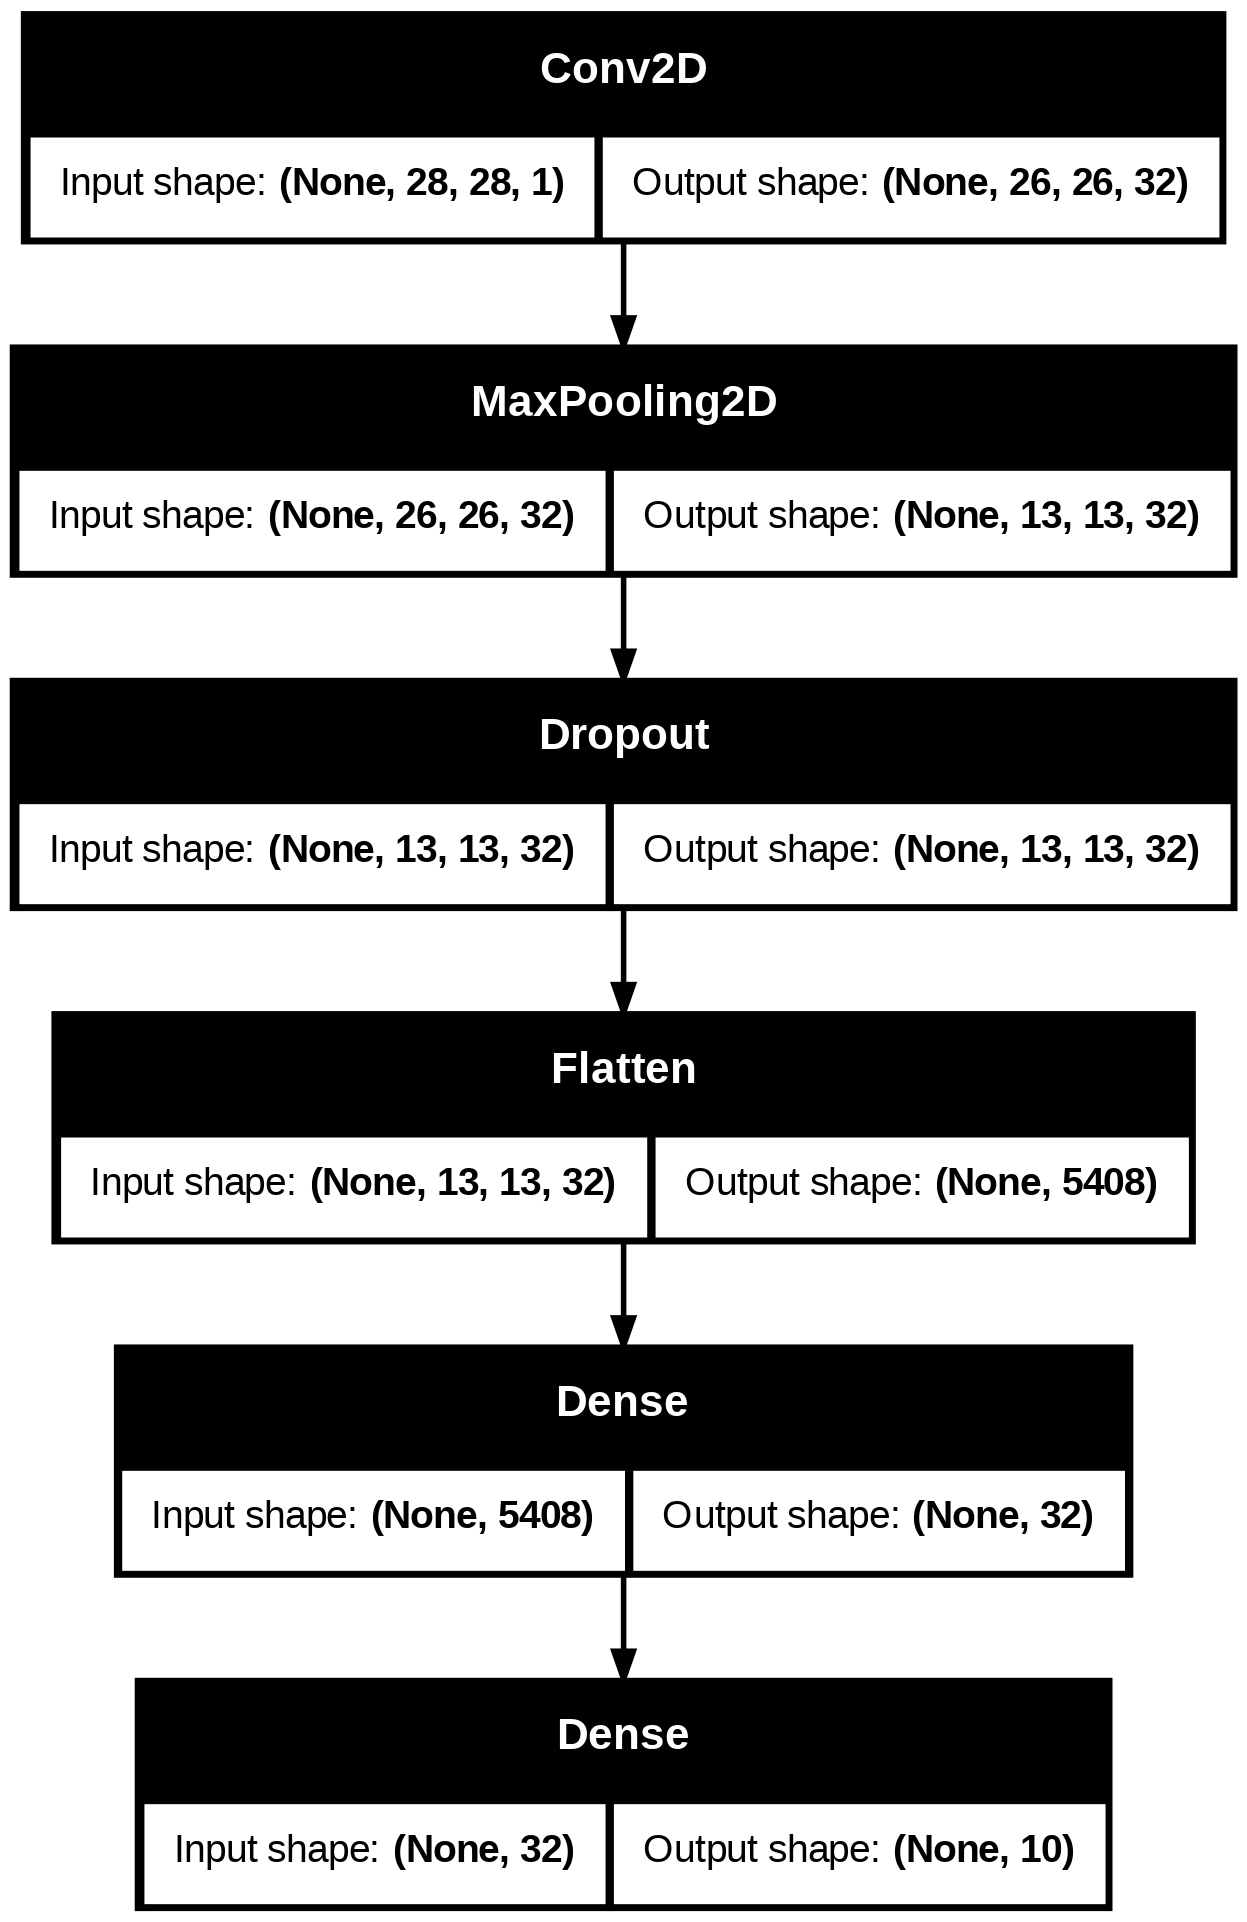

In [ ]:
plot_model(classifier, to_file='my_neural_network_model.png',
           show_shapes=True,
           show_layer_names=False)

## Start training model

- `batch_size` has to be a number that the training data size is divisible with.<br>Our training data size here is 48000, so batch_size is something that 48000 can be divided by without leaving any remainder.

- Bigger number of `batch_size` = faster training process.

- 1 epoch = from input layer -> all the way to output layer -> back to input layer again to update weights value (W).

In [ ]:
run_model = classifier.fit(X_train, y_train,
                           batch_size = 500,
                           epochs = 30,
                           verbose = 1, # 0 for no animation
                           validation_data = (X_validate, y_validate))

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 344ms/step - accuracy: 0.9321 - loss: 0.1889 - val_accuracy: 0.9172 - val_loss: 0.2419
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 255ms/step - accuracy: 0.9324 - loss: 0.1867 - val_accuracy: 0.9162 - val_loss: 0.2441
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 255ms/step - accuracy: 0.9313 - loss: 0.1868 - val_accuracy: 0.9178 - val_loss: 0.2400
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - accuracy: 0.9340 - loss: 0.1812 - val_accuracy: 0.9153 - val_loss: 0.2455
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 249ms/step - accuracy: 0.9348 - loss: 0.1796 - val_accuracy: 0.9182 - val_loss: 0.2453
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - accuracy: 0.9338 - loss: 0.1817 - val_accuracy: 0.9157 - val_loss: 0.2469
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.9380 - loss: 0.1682 - val_accuracy: 0.9168 - val_loss: 0.2440
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 42s 252ms/step - accuracy: 0.9386 - loss: 0.1690 - val_accu

- Loss: cost function, the existing error -> has to be minimized, the closer to 0 the better.

- Accuracy: accuracy level of model in predicting -> the higher (the closer to 1), the better.

In [ ]:
# for GPU setting when run on Desktop (Spyder, Pycharm, dll).

from tensorflow.python.keras.backend import set_session
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior

config = tf.ConfigProto()
config.gpu_options.allow_growth = True # to build memory in GPU
config.log_device_placement = True # to save log
sess = tf.Session(config=config)
set_session(sess)

Device mapping: no known devices.


In [ ]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.17.0
3.4.1


## Parameters being saved during training process

In [ ]:
print(run_model.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Plotting of accuracy during training process

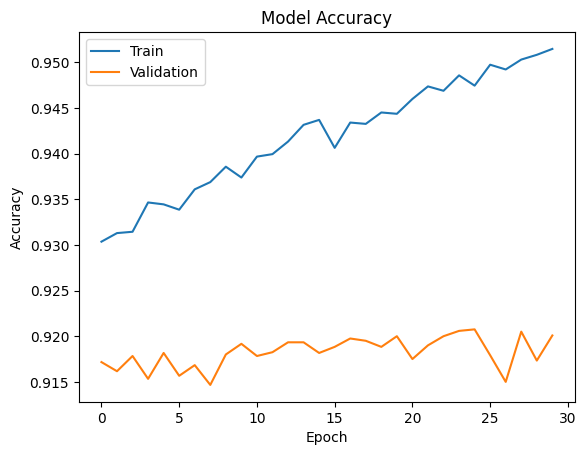

In [ ]:
plt.plot(run_model.history['accuracy'])
plt.plot(run_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Plotting of cost during training process

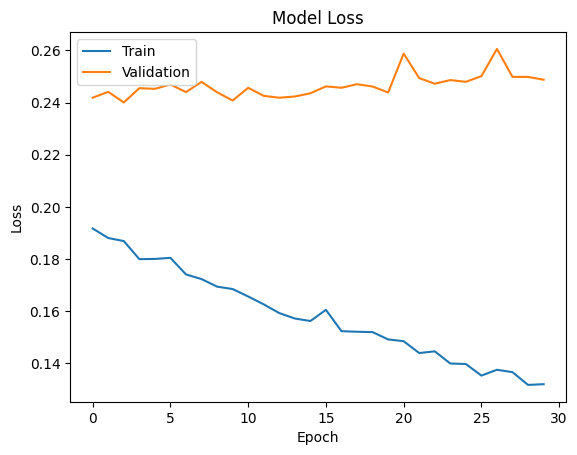

In [ ]:
plt.plot(run_model.history['loss'])
plt.plot(run_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Evaluate CNN model

In [ ]:
eval = classifier.evaluate(X_test, y_test)
print('Test Accuracy = {:.2f}'.format(eval[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9122 - loss: 0.2713
Test Accuracy = 0.92


## Save model

In [ ]:
classifier.save('fashion_mnist_cnn.h5', include_optimizer=True)
print('Model has been saved')

Model has been saved


## Load model

In [ ]:
'''
from keras.models import load_model
cclassifier = load_model('fashion_mnist_cnn.h5')

can be reused for other similar cases with B&W, 28x28 pixels image features.
'''

"\nfrom keras.models import load_model\ncclassifier = load_model('fashion_mnist_cnn.h5')\n\ncan be reused for other similar cases with B&W, 28x28 pixels image features.\n"

## Predicting categories in test set

In [ ]:
prediction_result = classifier.predict(X_test)

prediction_result

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[8.74790829e-03, 2.33462837e-04, 7.12551083e-03, ...,
        9.95533586e-01, 8.10848549e-02, 9.99993205e-01],
       [9.67546105e-01, 7.24712096e-11, 1.00000000e+00, ...,
        5.31528943e-19, 2.32827603e-07, 1.73268930e-12],
       [2.64171418e-03, 1.00000000e+00, 4.62693191e-04, ...,
        1.86542759e-09, 7.49174296e-06, 4.70504573e-11],
       ...,
       [1.95489824e-02, 9.11920665e-07, 5.67483343e-02, ...,
        1.54277477e-05, 9.99989092e-01, 3.18451021e-05],
       [1.02694733e-02, 9.99997020e-01, 1.41175184e-03, ...,
        3.47310618e-07, 1.32822752e-05, 6.00646715e-08],
       [1.39522785e-02, 3.40392326e-05, 1.57574132e-01, ...,
        6.51739240e-01, 4.28044289e-01, 6.39330685e-01]], dtype=float32)

## Make visualization of prediction result

<ipython-input-43-b3aa8119dced>:10: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


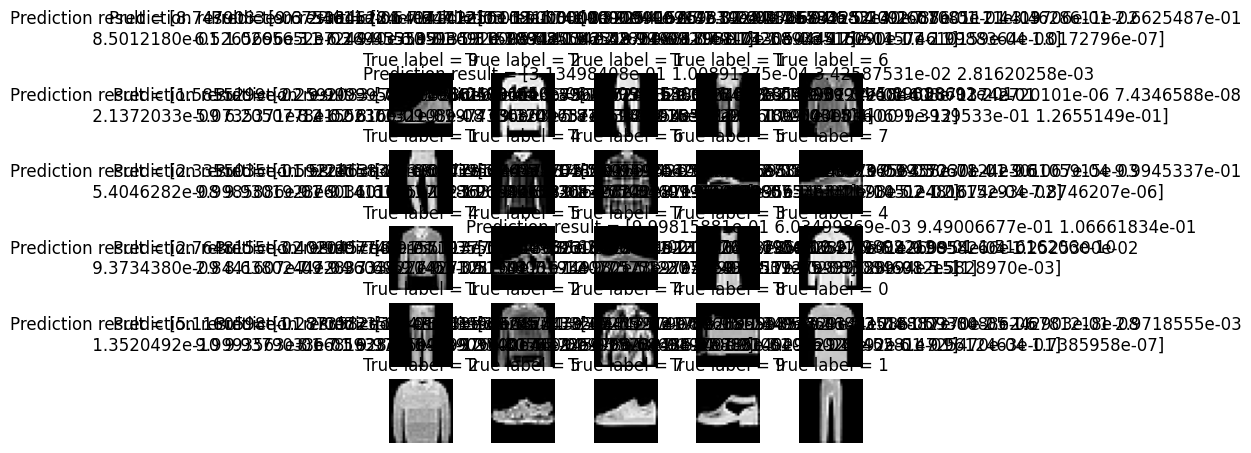

In [ ]:
fig, axes = plt.subplots(5, 5)

axes = axes.ravel()

for i in np.arange(0, 5*5):
  axes[i].imshow(X_test[i].reshape(28,28), cmap='gray')
  axes[i].set_title(f'Prediction result = {prediction_result[i]}\nTrue label = {y_test[i]}')
  axes[i].axis('off')

plt.tight_layout()

## Make confusion matrix

<Axes: xlabel='Prediction', ylabel='True'>

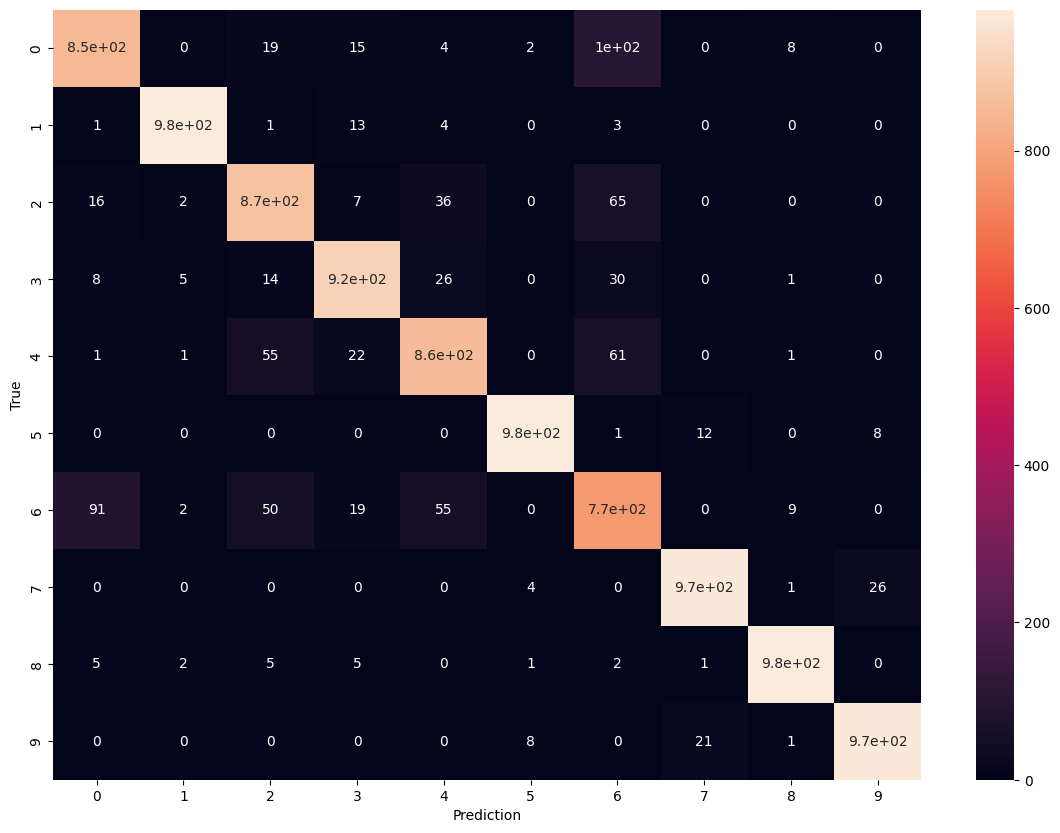

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np # Make sure numpy is imported

# Convert prediction probabilities to class labels
prediction_result_classes = np.argmax(prediction_result, axis=1)

# Now you can calculate the confusion matrix:
cm = confusion_matrix(y_test, prediction_result_classes)
cm_label = pd.DataFrame(cm, columns=np.unique(y_test), index=np.unique(y_test))

cm_label.index.name = 'True' # for x-axis
cm_label.columns.name = 'Prediction' # for y-axis

plt.figure(figsize=(14,10))
sns.heatmap(cm_label, annot=True) # annot=True to show numbers on the heatmap

## Make summary of model performance

In [ ]:
from sklearn.metrics import classification_report

categories_number = 10

target_names = ['Categories {}'.format(i) for i in range(categories_number)]

print(classification_report(y_test, prediction_result_classes, target_names=target_names))

              precision    recall  f1-score   support

Categories 0       0.87      0.85      0.86      1000
Categories 1       0.99      0.98      0.98      1000
Categories 2       0.86      0.87      0.87      1000
Categories 3       0.92      0.92      0.92      1000
Categories 4       0.87      0.86      0.87      1000
Categories 5       0.98      0.98      0.98      1000
Categories 6       0.75      0.77      0.76      1000
Categories 7       0.97      0.97      0.97      1000
Categories 8       0.98      0.98      0.98      1000
Categories 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



- Categories 0: T-shirt/top
- Categories 1: Trouser
- Categories 2: Pullover (sweater)
- Categories 3: Dress
- Categories 4: Coat
- Categories 5: Sandal
- Categories 6: Shirt
- Categories 7: Sneaker
- Categories 8: Bag
- Categories 9: Ankle boot

Categories 0, 2, 4, and especially 6 show low f1-score.

It is understandable as T-shirt, sweater, coat, and shirt look quite similar that even human's eyes can identify them incorrectly when seeing those fashion items from afar.
